# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import re
pwd = ! pwd
pwd = re.sub('notebooks/1-notebooks_prepare_HCC_data', '', pwd[0])
pwd

'/home/jovyan/work/'

In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"figure.figsize": (8, 6), "axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 8, 6

sns.set_theme(style="darkgrid")

# Import data

In [25]:
peakTable = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples-remove_corr.csv', sep=',', decimal='.',
                        na_values=np.nan, low_memory=False)

print(peakTable.shape)
peakTable.head()

(186, 1281)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN


In [27]:
metadata = peakTable.iloc[:, ['variable_' not in col for col in peakTable.columns]]
print(metadata.shape)
metadata.head()

(186, 944)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,1.0,1.284089,NaN,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,1.0,0.009881,NaN,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635


In [12]:
metadata.to_csv('useful_metadata.csv', index=False, header=True)

# Import metadata file for explanations

In [9]:
metadata_explanations = pd.read_csv(pwd + 'data/prepare_HCC_data/Data_Dict_Live_Caco.csv', sep=',', decimal='.',
                                    na_values=np.nan, low_memory=False)
metadata_explanations.head()

,#,Variable,Label,Type,Length,Format,Value code,Value label
0,114.0,A_1_Ftp,Age at first full term pregnancy,Num,8.0,3.,NaN,NaN
1,103.0,A_1_Per_Aggr,Age at first menstrual period (aggregated),Num,8.0,3.,NaN,NaN
2,113.0,A_1_Pregnancy,Age at first of all pregnancy,Num,8.0,3.,NaN,NaN
3,63.0,A_Gallst,Age gallstones,Num,8.0,2.,NaN,NaN
4,86.0,A_Giv_Cig_Aggr,Age give up smoking cigarettes (aggregated),Num,8.0,3.,NaN,NaN


In [15]:
metadata_explanations[metadata_explanations['Variable'].isin(metadata.columns)]

,#,Variable,Label,Type,Length,Format,Value code,Value label
6,59.0,A_Hyperl,Age hyperlipidaemia (high blood lipids),Num,8.0,2.,NaN,NaN
7,56.0,A_Hypert,Age hypertension (high blood pressure),Num,8.0,2.,NaN,NaN
13,315.0,Adipo_LIVE_02,Adiponectin (µg/ml),Num,8.0,NaN,NaN,NaN
14,321.0,Afp_LIVE_03,Alpha-Feto protein (kIU/l),Num,8.0,NaN,NaN,NaN
15,46.0,Age_Blood,Age at blood collection,Num,8.0,9.5,NaN,NaN
...,...,...,...,...,...,...,...,...
784,251.0,Wcrf_Pa,Be moderately physically active,Num,8.0,NaN,NaN,NaN
785,257.0,Wcrf_Pf,Eat mostly foods of plant origin,Num,8.0,NaN,NaN,NaN
786,267.0,Wcrf_Pf_Cal,Eat mostly foods of plant origin (calibrated),Num,8.0,NaN,NaN,NaN
787,71.0,Weight_Adj,Weight (adjusted for clothing),Num,8.0,5.1,NaN,NaN


In [11]:
list(set(metadata.columns) - set(metadata_explanations[metadata_explanations['Variable'].isin(metadata.columns)]['Variable']))

['SampleID',
 'Id Aliquot',
 'Id_Bma',
 'CaseCtrl',
 'SampleID_full',
 'Idepic_Samp']

# Keep only useful metadata (by hand)

In [137]:
col_to_keep = ['country', 'Idepic_Bio', 'Idepic_Samp', 'SampleID', 'Id_Bma',
       'Id Aliquot', 'CaseCtrl', 'ID_split_HCC', 'Idepic', 'Match_Caseset',
       'Case_HCC_Wide', 'Typ_Tumo', 'Vit_Stat', 'C_Death_O', 'Q_Death_O',
               'Sitelive', 'Morplive',
       'Behalive', 'Sdg1live', 'Gradlive', 'Bdg1live', 'Staglive',
               'Case_HCC', 'Case_IBD',
       'Case_GBT', 'Case_EBD', 'Case_Gallblad', 'Case_AOV', 'Case_CCA_Intra',
       'Case_CCA_Extra', 'Case_CCA_Extra_Peri', 'Case_CCA_Extra_Dist',
       'Cncr_Caco_Live',
               'Sex', 'Age_Blood', 'Fasting', 'Fasting_C', 'Menop_Bld', 'Mar_Stat', 'L_School', 'Hypert', 'A_Hypert', 'T_Hypert',
       'Diabet', 'Age_Recr',
       'Height_Adj', 'Weight_Adj', 'Hip_Adj', 'Waist_Adj', 'Whr_Adj',
       'Bmi_Adj', 'Height_C', 'Weight_C', 'Hip_C', 'Waist_C', 'Whr_C', 'Bmi_C',
       'Smoke_Stat', 'Smoke_Intensity', 'N_Ftp', 'Pa_Score_C', 'Pa_Index', 'Pa_Total', 'Pa_Total_Sx',
               'Alc_Lifetime', 'Alc_Drinktime', 
               'Qge10', 'Wcrf', 
               'Flic_IgG', 'Flic_IgG_Adj', 'LPS_IgG', 'LPS_IgG_Adj', 'Flic_IgA',
       'Flic_IgA_Adj', 'LPS_IgA', 'LPS_IgA_Adj', 'Igf1', 'Igf1_LIVE_01',
               'Aminoacid_Ala', 'Aminoacid_Arg', 'Aminoacid_Asn', 'Aminoacid_Asp',
       'Aminoacid_Cit', 'Aminoacid_Gln', 'Aminoacid_Glu', 'Aminoacid_Gly',
       'Aminoacid_His', 'Aminoacid_Ile', 'Aminoacid_Leu', 'Aminoacid_Lys',
       'Aminoacid_Met', 'Aminoacid_Orn', 'Aminoacid_Phe', 'Aminoacid_Pro',
       'Aminoacid_Ser', 'Aminoacid_Thr', 'Aminoacid_Trp', 'Aminoacid_Tyr',
       'Aminoacid_Val',
              
              'Acylcarn_C0', 'Acylcarn_C10', 'Acylcarn_C10_1', 'Acylcarn_C12',
       'Acylcarn_C12_1', 'Acylcarn_C14_1', 'Acylcarn_C14_2', 'Acylcarn_C16',
       'Acylcarn_C16_1', 'Acylcarn_C18', 'Acylcarn_C18_1', 'Acylcarn_C18_2',
       'Acylcarn_C2', 'Acylcarn_C3', 'Acylcarn_C3_Dc_C4_Oh_', 'Acylcarn_C4',
       'Acylcarn_C5', 'Acylcarn_C5_1_Dc', 'Acylcarn_C7_Dc',
               
               'Biogenic_Ac_Orn', 'Biogenic_Adma', 'Biogenic_Alpha_Aaa',
       'Biogenic_Creatinine', 'Biogenic_Kynurenine', 'Biogenic_Met_So',
       'Biogenic_Sarcosine', 'Biogenic_Serotonin', 'Biogenic_Spermidine',
       'Biogenic_Spermine', 'Biogenic_Taurine', 'Biogenic_Total_Dma',
               
               'Glyceroph_Lysopc_A_C14_0', 'Glyceroph_Lysopc_A_C16_0',
       'Glyceroph_Lysopc_A_C16_1', 'Glyceroph_Lysopc_A_C17_0',
       'Glyceroph_Lysopc_A_C18_0', 'Glyceroph_Lysopc_A_C18_1',
       'Glyceroph_Lysopc_A_C18_2', 'Glyceroph_Lysopc_A_C20_3',
       'Glyceroph_Lysopc_A_C20_4', 'Glyceroph_Lysopc_A_C24_0',
       'Glyceroph_Lysopc_A_C28_0', 'Glyceroph_Lysopc_A_C28_1',
       'Glyceroph_Pc_Aa_C24_0', 'Glyceroph_Pc_Aa_C28_1',
       'Glyceroph_Pc_Aa_C30_0', 'Glyceroph_Pc_Aa_C32_0',
       'Glyceroph_Pc_Aa_C32_1', 'Glyceroph_Pc_Aa_C32_2',
       'Glyceroph_Pc_Aa_C32_3', 'Glyceroph_Pc_Aa_C34_1',
       'Glyceroph_Pc_Aa_C34_2', 'Glyceroph_Pc_Aa_C34_3',
       'Glyceroph_Pc_Aa_C34_4', 'Glyceroph_Pc_Aa_C36_0',
       'Glyceroph_Pc_Aa_C36_1', 'Glyceroph_Pc_Aa_C36_2',
       'Glyceroph_Pc_Aa_C36_3', 'Glyceroph_Pc_Aa_C36_4',
       'Glyceroph_Pc_Aa_C36_5', 'Glyceroph_Pc_Aa_C36_6',
       'Glyceroph_Pc_Aa_C38_0', 'Glyceroph_Pc_Aa_C38_3',
       'Glyceroph_Pc_Aa_C38_4', 'Glyceroph_Pc_Aa_C38_5',
       'Glyceroph_Pc_Aa_C38_6', 'Glyceroph_Pc_Aa_C40_1',
       'Glyceroph_Pc_Aa_C40_2', 'Glyceroph_Pc_Aa_C40_3',
       'Glyceroph_Pc_Aa_C40_4', 'Glyceroph_Pc_Aa_C40_5',
       'Glyceroph_Pc_Aa_C40_6', 'Glyceroph_Pc_Aa_C42_0',
       'Glyceroph_Pc_Aa_C42_1', 'Glyceroph_Pc_Aa_C42_2',
       'Glyceroph_Pc_Aa_C42_4', 'Glyceroph_Pc_Aa_C42_5',
       'Glyceroph_Pc_Aa_C42_6', 'Glyceroph_Pc_Ae_C30_0',
       'Glyceroph_Pc_Ae_C30_2', 'Glyceroph_Pc_Ae_C32_1',
       'Glyceroph_Pc_Ae_C32_2', 'Glyceroph_Pc_Ae_C34_0',
       'Glyceroph_Pc_Ae_C34_1', 'Glyceroph_Pc_Ae_C34_2',
       'Glyceroph_Pc_Ae_C34_3', 'Glyceroph_Pc_Ae_C36_0',
       'Glyceroph_Pc_Ae_C36_1', 'Glyceroph_Pc_Ae_C36_2',
       'Glyceroph_Pc_Ae_C36_3', 'Glyceroph_Pc_Ae_C36_4',
       'Glyceroph_Pc_Ae_C36_5', 'Glyceroph_Pc_Ae_C38_0',
       'Glyceroph_Pc_Ae_C38_2', 'Glyceroph_Pc_Ae_C38_3',
       'Glyceroph_Pc_Ae_C38_4', 'Glyceroph_Pc_Ae_C38_5',
       'Glyceroph_Pc_Ae_C38_6', 'Glyceroph_Pc_Ae_C40_1',
       'Glyceroph_Pc_Ae_C40_2', 'Glyceroph_Pc_Ae_C40_3',
       'Glyceroph_Pc_Ae_C40_4', 'Glyceroph_Pc_Ae_C40_5',
       'Glyceroph_Pc_Ae_C40_6', 'Glyceroph_Pc_Ae_C42_1',
       'Glyceroph_Pc_Ae_C42_2', 'Glyceroph_Pc_Ae_C42_3',
       'Glyceroph_Pc_Ae_C42_4', 'Glyceroph_Pc_Ae_C42_5',
       'Glyceroph_Pc_Ae_C44_3', 'Glyceroph_Pc_Ae_C44_4',
       'Glyceroph_Pc_Ae_C44_5', 'Glyceroph_Pc_Ae_C44_6',
               
               'Sphingo_Sm_Oh_C14_1', 'Sphingo_Sm_Oh_C16_1', 'Sphingo_Sm_Oh_C22_1',
       'Sphingo_Sm_Oh_C22_2', 'Sphingo_Sm_Oh_C24_1', 'Sphingo_Sm_C16_0',
       'Sphingo_Sm_C16_1', 'Sphingo_Sm_C18_0', 'Sphingo_Sm_C18_1',
       'Sphingo_Sm_C20_2', 'Sphingo_Sm_C24_0', 'Sphingo_Sm_C24_1',
       'Sphingo_Sm_C26_0', 'Sphingo_Sm_C26_1',
               
               'Met_Phenylalanine', 'Met_Phenylalanine_Std',
       'Met_Tyrosine', 'Met_Tyrosine_Std', 'Met_Ethanol', 'Met_Ethanol_Std',
       'Met_Choline', 'Met_Choline_Std', 'Met_Citrate', 'Met_Citrate_Std',
       'Met_Glutamine', 'Met_Glutamine_Std', 'Met_Glutamate',
       'Met_Glutamate_Std', 'Met_N_Acetylglycoproteins',
       'Met_N_acetylglycoproteins_Std', 'Met_Acetate', 'Met_Acetate_Std',
       'Met_Propyleneglycol', 'Met_Propyleneglycol_Std', 'Met_Valine',
       'Met_Valine_Std', 'Met_Isoleucine', 'Met_Isoleucine_Std', 'Met_Leucine',
       'Met_Leucine_Std', 'Met_Pufa', 'Met_Pufa_Std', 'Met_Alllipids',
       'Met_Alllipids_Std', 'Met_Glucose', 'Met_Glucose_Std',
       'Met_Serumclotcontacttime',
               
               'IL6',
               'Sepp', 'Selenium', 'Copper', 'Zinc',
       'Iron', 'Calcium', 'Lab_25OH_VitD3', 'Lab_25OH_VitD2', 'A1c', 'Hb',
       'HbA1c', 'HbA1c2', 'Chol', 'Alp', 'Alt', 'Ast', 'Dbil', 'Tbil', 'Ggt',
       'Rom', 'Shp', 'Hcv_Ab', 'HBsAg', 'Ca', 'Cdca', 'Dca', 'Gca', 'Gcdca',
       'Gdca', 'Ghca', 'Glca', 'Gudca', 'Hca', 'Tamca', 'Tca', 'Tcdca', 'Tdca',
       'Thca', 'Tudca', 'Udca', 'Shbg', 'Testo',
               
               'Hepatitis', 'HBV_status', 'HCV_status', 'HBV_status1', 'HCV_status1', 'HbV_status2',
       'HcV_status2', 'whr_cat', 'BMI_cat', 'Age_blood_cat', 'alc_drinker_m',
       'waist_height',
               
               
               'l2Ca', 'l2Cdca',
       'l2Dca', 'l2Gca', 'l2Gcdca', 'l2Gdca', 'l2Ghca', 'l2Glca', 'l2Gudca',
       'l2Hca', 'l2Tca', 'l2Tcdca', 'l2Tdca', 'l2Thca', 'l2Tudca', 'l2Tamca',
       'l2Udca', 'perCa', 'perCdca', 'perDca', 'perGca', 'perGcdca', 'perGdca',
       'perGhca', 'perGlca', 'perGudca', 'perHca', 'perTca', 'perTcdca',
       'perTdca', 'perThca', 'perTudca', 'perTamca', 'perUdca', 'tot_ba',
       'prim_BA', 'prim2_ba', 'sec_ba', 'sec2_ba', 'dca_ca', 'udca_cdca',
       'conj_ba', 'Tconj_ba', 'Gconj_ba', 'unconj_ba', 'tot_cdca', 'tot_ca',
       'tot_dca', 'tot_udca', 'tot_hca', 'prim_sec', 'l2tot_ba', 'l2prim_ba',
       'l2sec_ba', 'l2prim2_ba', 'l2sec2_ba', 'l2conj_ba', 'l2Tconj_ba',
       'l2Gconj_ba', 'l2unconj_ba', 'l2tot_cdca', 'l2tot_ca', 'l2tot_dca',
       'l2tot_udca', 'l2tot_hca', 'ALTsc2', 'ASTsc2', 'GGTsc2', 'ALPsc2',
       'TBsc2', 'score22', 'score22_cat', 'total', 'ca2', 'Cdca2', 'Dca2',
       'Gca2', 'Gcdca2', 'Gdca2', 'Ghca2', 'Glca2', 'Gudca2', 'Hca2', 'Tca2',
       'Tcdca2', 'Tdca2', 'Thca2', 'Tudca2', 'Tamca2', 'Udca2', 'l2Ca2', 'l2total',
       'l2Cdca2', 'l2Dca2', 'l2Gca2', 'l2Gcdca2', 'l2Gdca2', 'l2Ghca2',
       'l2Glca2', 'l2Gudca2', 'l2Hca2', 'l2Tca2', 'l2Tcdca2', 'l2Tdca2',
       'l2Thca2', 'l2Tudca2', 'l2Tamca2', 'l2Udca2', 'l10Ca2', 'l10total',
       'l10Cdca2', 'l10Dca2', 'l10Gca2', 'l10Gcdca2', 'l10Gdca2', 'l10Ghca2',
       'l10Glca2', 'l10Gudca2', 'l10Hca2', 'l10Tca2', 'l10Tcdca2', 'l10Tdca2',
       'l10Thca2', 'l10Tudca2', 'l10Tamca2', 'l10Udca2', 'prim_BA2', 'sec_ba2',
       'conj_ba2', 'Tconj_ba2', 'Gconj_ba2', 'unconj_ba2', 'tot_cdca2',
       'tot_ca2', 'tot_dca2', 'tot_udca2', 'tot_hca2', 'l2prim_BA2',
       'l2sec_ba2', 'l2conj_ba2', 'l2Tconj_ba2', 'l2Gconj_ba2', 'l2unconj_ba2',
       'l2tot_cdca2', 'l2tot_ca2', 'l2tot_dca2', 'l2tot_udca2', 'l2tot_hca2',
               
               
               'bcaa', 'aaa', 'fr', 'fr2', 'fli', 'count',
       'Alat_LIVE_03', 'Alp_LIVE_03', 'Asat_LIVE_03', 'Gamma_Gt_LIVE_03',
       'Hbv_Status_LIVE_03', 'Hcv_Status_LIVE_03', 'Alat_INTE_01',
       'Alp_INTE_01', 'Asat_INTE_01', 'Gamma_Gt_INTE_01', 'Alat_LIVE_05',
       'Alp_LIVE_05', 'Asat_LIVE_05', 'Gamma_Gt_LIVE_05', 'Hbv_Status_LIVE_05',
       'Hcv_Status_LIVE_05', 'hepatitis05', 'hepatitis03', 'n3', 'prim_unconj',
       'prim_conj', 'sec_conj', 'sec_unconj', 'prim_conj2', 'sec_conj2',
       'prim_unconj2', 'sec_unconj2', 'l2prim_conj2', 'l2sec_conj2',
       'l2prim_unconj2', 'l2sec_unconj2', 'prim_all2', 'seca_all2', 'sec_all2',
       'l2prim_all2', 'l2sec_all2', 'prim_all', 'sec_all', 'seca_all',
       'prim_BA_main', 'sec_ba_main', 'prim_sec_r', 'Gconj_Tconj_r',
       'dca_ca_r', 'udca_cdca_r', 'prim_BA_main2', 'sec_ba_main2',
       'prim_sec_r2', 'Gconj_Tconj_r2', 'dca_ca_r2', 'udca_cdca_r2',
       'prim2_ba2', 'sec2_ba2', 'l2prim_BA_main', 'l2sec_ba_main',
       'l2prim_conj', 'l2sec_conj', 'l2prim_BA_main2', 'l2sec_ba_main2',
               
               'hydrophobicBA', 'hydrophilicBA', 'hydrophobicBA2', 'hydrophilicBA2',
       'tg1', 'ghydrophobicBA', 'thydrophobicBA', 'ghydrophilicBA',
       'thydrophilicBA', 'ghydrophobicBA2', 'thydrophobicBA2',
       'ghydrophilicBA2', 'thydrophilicBA2', 'fobBA2', 'filBA2',
       'l2hydrophobicBA', 'l2ghydrophobicBA', 'l2thydrophobicBA',
       'l2hydrophilicBA', 'l2ghydrophilicBA', 'l2thydrophilicBA',
       'l2hydrophobicBA2', 'l2ghydrophobicBA2', 'l2thydrophobicBA2',
       'l2hydrophilicBA2', 'l2ghydrophilicBA2', 'l2thydrophilicBA2', 'l2fob2',
       'l2fil2', 'Gconj_Tconj_r3', 'fattyliver', 'hsi', 'steat',
               'Hyperl', 'T_Hyperl',
               'Gallst', 'T_Gallst',
               
               'Systol_1', 'Diastol_1', 'Hpulse_1',
       'Systol_2', 'Diastol_2', 'Hpulse_2',
               
               
               'Adipo_LIVE_02', 'Afp_LIVE_03',
       'Alb_LIVE_03', 'Anti_Hcv_Pct_LIVE_03', 'Crp_LIVE_02', 'Crp_LIVE_03',
       'Fe_LIVE_03', 'Ferr_LIVE_03', 'Fetuin_A_LIVE_02', 'Gldh_LIVE_02',
       'Hbsag_Unit_LIVE_03', 'Hmw_Adipo_LIVE_02', 'Il6_LIVE_02', 'Ldh_LIVE_03',
       'Leptin_LIVE_02', 'Tbil_LIVE_03', 'Tot_Protein_LIVE_03', 'Trf_LIVE_03',
       'Alb_INTE_01', 'Apoa1_INTE_01', 'Apob_INTE_01', 'Calcium_INTE_01',
       'Chol_INTE_01', 'Chol_Hdl_INTE_01', 'Chol_Ldl_INTE_01',
       'Creatinine_INTE_01', 'Crp_INTE_01', 'Fe_INTE_01', 'Ferr_INTE_01',
       'Glucose_INTE_01', 'Hba1c_Ifcc_INTE_01', 'Hba1c_Ngsp_INTE_01',
       'Lpa_INTE_01', 'Magnesium_INTE_01', 'Tbil_INTE_01', 'Tg_INTE_01', 'Tibc_INTE_01',
       'Trf_INTE_01', 'Uric_Acid_INTE_01', 'A1c_LIVE_05', 'Ca_LIVE_04',
       'Cdca_LIVE_04', 'Chol_LIVE_05', 'Chol_Hdl_LIVE_05', 'Chol_Ldl_LIVE_05',
       'Dca_LIVE_04', 'Gca_LIVE_04', 'Gcdca_LIVE_04', 'Gdca_LIVE_04',
       'Ghca_LIVE_04', 'Glca_LIVE_04', 'Gudca_LIVE_04', 'Hb_LIVE_05',
       'Hba1c_Ifcc_LIVE_05', 'Hba1c_Ngsp_LIVE_05', 'Hca_LIVE_04',
       'Tamca_LIVE_04', 'Tca_LIVE_04', 'Tcdca_LIVE_04', 'Tdca_LIVE_04',
       'Tg_LIVE_05', 'Thca_LIVE_04', 'Tudca_LIVE_04', 'Udca_LIVE_04',
               'Shbg_LIVE_01', 'Testo_LIVE_01', 'Dbil_LIVE_05',
       'Rom_LIVE_05', 'Shp_LIVE_05', 'Tbil_LIVE_05',
               
               
               'HepBC', 'HepB', 'HepC', 'ggt1', 'ggt2', 'ggt3', 'Sumggt',
       'alp1', 'alp2', 'alp3', 'Sumalp', 'ast1', 'ast2', 'ast3', 'Sumast',
       'alt1', 'alt2', 'alt3', 'Sumalt', 'tbil1', 'tbil2', 'tbil3', 'Sumtbil',
       'ggt6', 'alt6', 'ast6', 'alp6', 'tbil6', 'newdiabet', 'diabet1',
       'systol_3', 'diastol_3', 'elevatedbp', 'waist_idf', 'hdl1',
       'reduced_hdl1', 'fast_st1', 'logtg1', 'logtgnew1', 'tgnew1',
       'elevated_tg1', 'point', 'point2', 'point3', 'bart', 'ast_alt'
              
              ]

## Below are the columns we drop

In [138]:
metadata.drop(col_to_keep, axis=1).head()

,Center,A_Imputation_,Match_Round,Match_Ctrlnum,Country,D_Dthlst,D_Endfup,Why_Endfup,Tnmlive,D_Dglive,...,lab,lab_tbil,A_Hyperl,A_Gallst,D_Bld_Pres,Tec_Bld_Pres,Bld_Pres,Indic1,Indic2,SumI
0,41.0,10.0,NaN,NaN,4,22-Feb-02,17-May-01,Cancer e,NaN,17-May-01,...,1.0,NaN,NaN,NaN,01-Jun-94,Accutorr,Yes,1.0,NaN,NaN
1,41.0,10.0,2.0,1.0,4,NaN,31-Dec-11,Cancer r,NaN,NaN,...,1.0,NaN,NaN,NaN,23-Jun-94,Accutorr,Yes,1.0,NaN,NaN
2,41.0,10.0,NaN,NaN,4,NaN,13-Jul-07,Cancer e,NaN,13-Jul-07,...,2.0,NaN,NaN,NaN,13-Dec-94,Accutorr,Yes,NaN,1.0,NaN
3,41.0,10.0,3.0,1.0,4,NaN,31-Dec-11,Cancer r,NaN,NaN,...,2.0,NaN,NaN,NaN,11-Jan-95,Accutorr,Yes,NaN,1.0,NaN
4,21.0,10.0,NaN,NaN,2,10-Sep-05,14-Jan-05,Cancer e,NaN,14-Jan-05,...,2.0,NaN,NaN,NaN,20-Nov-96,Merc. sphygmomanome.,Yes,NaN,1.0,NaN


## Below are the columns we keep

In [139]:
len(col_to_keep)

686

In [140]:
metadata_subset = metadata[col_to_keep]
metadata_subset

,country,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Match_Caseset,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,82.0,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,82.0,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,427.0,...,1.0,1.284089,NaN,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,427.0,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,376.0,...,1.0,0.009881,NaN,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.0,32____32253231,32253231-s3#C1,LivCan_080,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,56.0,...,0.0,1.852329,1.502329,4.492138,1.0,1.0,0.0,1.0,2.0,0.894737
182,2.0,22____22281416,22281416-s1#B1,LivCan_375,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,383.0,...,1.0,0.634712,NaN,1.886478,1.0,1.0,2.0,0.0,3.0,1.179878
183,2.0,22____22281701,22281701-s1#B1,LivCan_376,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,383.0,...,1.0,-0.065741,NaN,0.936374,0.0,1.0,0.0,0.0,1.0,0.670698
184,7.0,71____71000065,71000065-s2#C1,LivCan_165,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,147.0,...,0.0,1.564634,1.214634,3.369060,1.0,1.0,2.0,0.0,3.0,1.047283


In [141]:
metadata_subset.isna().sum()[metadata_subset.isna().sum()/len(metadata_subset) < 0.5].index

Index(['country', 'Idepic_Bio', 'Idepic_Samp', 'SampleID', 'Id_Bma',
       'Id Aliquot', 'CaseCtrl', 'ID_split_HCC', 'Idepic', 'Match_Caseset',
       ...
       'fast_st1', 'logtg1', 'logtgnew1', 'tgnew1', 'elevated_tg1', 'point',
       'point2', 'point3', 'bart', 'ast_alt'],
      dtype='object', length=615)

## Remove columns with more than 50% of missing values

In [293]:
mv_threshold = 0.5

metadata_subset2 = metadata_subset[metadata_subset.isna().sum()[metadata_subset.isna().sum()/len(metadata_subset) < mv_threshold].index]
metadata_subset2

,country,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Match_Caseset,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,82.0,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,82.0,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,427.0,...,1.0,1.284089,NaN,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,427.0,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,376.0,...,1.0,0.009881,NaN,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.0,32____32253231,32253231-s3#C1,LivCan_080,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,56.0,...,0.0,1.852329,1.502329,4.492138,1.0,1.0,0.0,1.0,2.0,0.894737
182,2.0,22____22281416,22281416-s1#B1,LivCan_375,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,383.0,...,1.0,0.634712,NaN,1.886478,1.0,1.0,2.0,0.0,3.0,1.179878
183,2.0,22____22281701,22281701-s1#B1,LivCan_376,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,383.0,...,1.0,-0.065741,NaN,0.936374,0.0,1.0,0.0,0.0,1.0,0.670698
184,7.0,71____71000065,71000065-s2#C1,LivCan_165,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,147.0,...,0.0,1.564634,1.214634,3.369060,1.0,1.0,2.0,0.0,3.0,1.047283


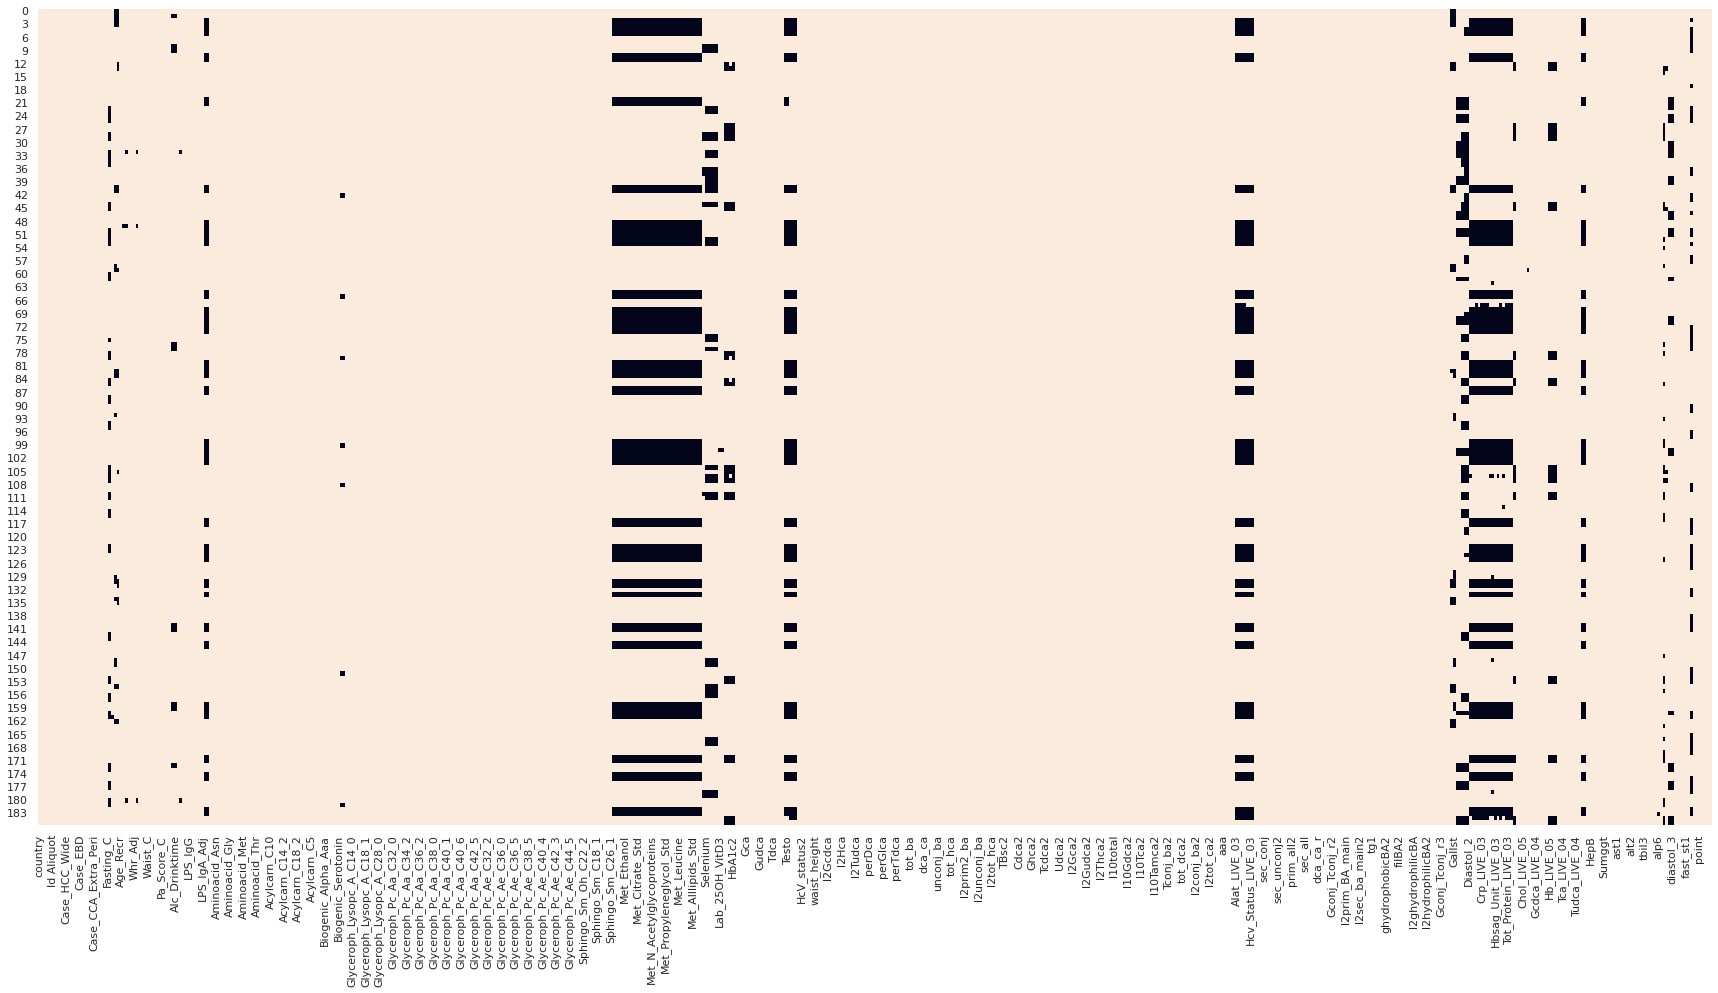

In [294]:
plt.figure(figsize=(30,15))
sns.heatmap(metadata_subset2.notna(), cbar=False);

# Separate metadata about sample IDs

In [295]:
metadata_IDs = metadata_subset2[['Idepic_Bio', 'Idepic_Samp', 'SampleID', 'Id_Bma', 'Id Aliquot', 'CaseCtrl', 'ID_split_HCC', 'Idepic']]
metadata_subset2 = metadata_subset2.drop(['Idepic_Bio', 'Idepic_Samp', 'SampleID', 'Id_Bma', 'Id Aliquot', 'ID_split_HCC', 'Idepic'], axis=1)
metadata_IDs

,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic
0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872
1,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868
2,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588
3,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214
4,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888
...,...,...,...,...,...,...,...,...
181,32____32253231,32253231-s3#C1,LivCan_080,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E
182,22____22281416,22281416-s1#B1,LivCan_375,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416
183,22____22281701,22281701-s1#B1,LivCan_376,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701
184,71____71000065,71000065-s2#C1,LivCan_165,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825


# Impute missing values in metadata

In [296]:
metadata_subset2.dtypes.value_counts()

float64    579
object      29
dtype: int64

### Impute missing values in qualitative (object) variables with "Unknown"

In [297]:
metadata_subset2.select_dtypes(include=['object'])

,CaseCtrl,Case_HCC_Wide,Vit_Stat,Case_HCC,Case_IBD,Case_GBT,Case_EBD,Case_Gallblad,Case_AOV,Case_CCA_Intra,...,Diabet,Smoke_Stat,Smoke_Intensity,Pa_Score_C,Pa_Index,Pa_Total,Pa_Total_Sx,Lab_25OH_VitD2,Hyperl,Gallst
0,Incident,Yes,Dead,Yes,No,No,No,No,No,No,...,NaN,Former,"Former,",Intense,Inactive,Moderate,Moderate,<1.56,NaN,NaN
1,Non-case,No,Alive,No,No,No,No,No,No,No,...,NaN,Former,"Former,",Minimum,Inactive,Moderate,Moderate,<1.56,NaN,NaN
2,Incident,Yes,Alive,Yes,No,No,No,No,No,No,...,NaN,Never,Never,Minimum,Moderate,Moderate,Moderate,<1.56,NaN,NaN
3,Non-case,No,Alive,No,No,No,No,No,No,No,...,NaN,Never,Never,Intense,Moderate,Active,Active,<1.56,NaN,NaN
4,Incident,Yes,Dead,No,No,No,No,No,No,No,...,No,Never,Never,Intense,Inactive,Moderate,Moderate,<1.56,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Non-case,No,Dead,No,No,No,No,No,No,No,...,Yes,Smoker,"Current,",Minimum,Moderate,Moderate,Moderate,<1.56,Yes,No
182,Incident,Yes,Dead,Yes,No,No,No,No,No,No,...,No,Never,Never,Moderate,Inactive,Moderate,Moderate,<1.56,No,No
183,Non-case,No,Alive,No,No,No,No,No,No,No,...,No,Never,Never,Moderate,Moderate,Moderate,Moderate,<1.56,No,No
184,Incident,Yes,Dead,Yes,No,No,No,No,No,No,...,No,Smoker,"Current,",Minimum,Moderate,Moderate,Moderate,<1.56,Yes,No


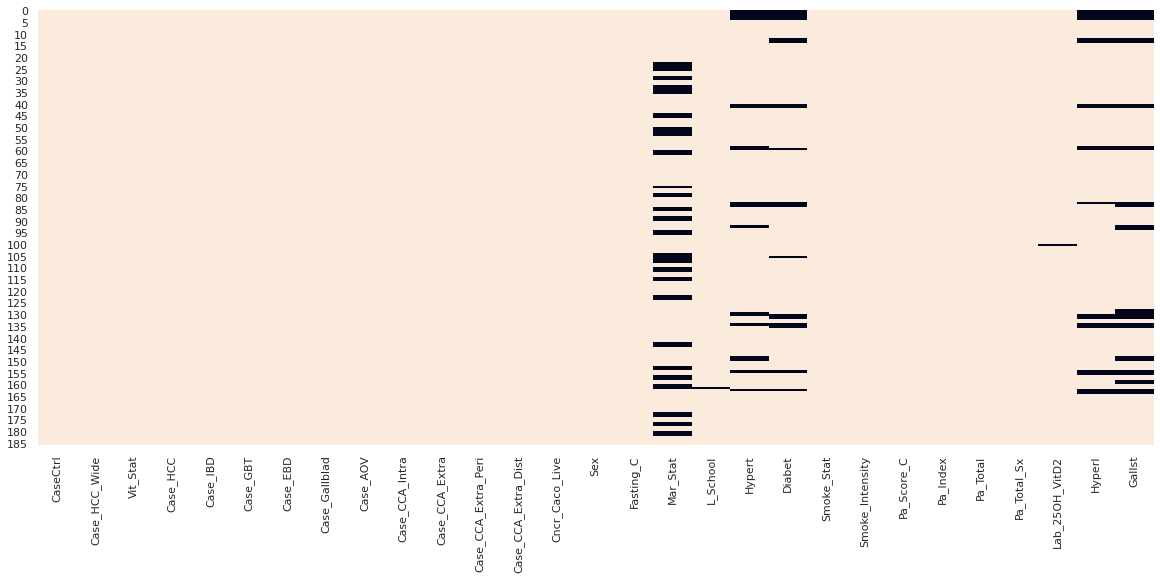

In [298]:
plt.figure(figsize=(20,8))
sns.heatmap(metadata_subset2.select_dtypes(include=['object']).notna(), cbar=False);

In [299]:
metadata_subset2['Mar_Stat']

0      Married/
1      Married/
2      Divorced
3      Married/
4      Divorced
         ...   
181         NaN
182    Married/
183    Married/
184    Divorced
185    Married/
Name: Mar_Stat, Length: 186, dtype: object

In [300]:
metadata_subset2[metadata_subset2.select_dtypes(include=['object']).columns] = metadata_subset2[metadata_subset2.select_dtypes(include=['object']).columns]\
                                                                                            .fillna('Unknown')
metadata_subset2.select_dtypes(include=['object'])

,CaseCtrl,Case_HCC_Wide,Vit_Stat,Case_HCC,Case_IBD,Case_GBT,Case_EBD,Case_Gallblad,Case_AOV,Case_CCA_Intra,...,Diabet,Smoke_Stat,Smoke_Intensity,Pa_Score_C,Pa_Index,Pa_Total,Pa_Total_Sx,Lab_25OH_VitD2,Hyperl,Gallst
0,Incident,Yes,Dead,Yes,No,No,No,No,No,No,...,Unknown,Former,"Former,",Intense,Inactive,Moderate,Moderate,<1.56,Unknown,Unknown
1,Non-case,No,Alive,No,No,No,No,No,No,No,...,Unknown,Former,"Former,",Minimum,Inactive,Moderate,Moderate,<1.56,Unknown,Unknown
2,Incident,Yes,Alive,Yes,No,No,No,No,No,No,...,Unknown,Never,Never,Minimum,Moderate,Moderate,Moderate,<1.56,Unknown,Unknown
3,Non-case,No,Alive,No,No,No,No,No,No,No,...,Unknown,Never,Never,Intense,Moderate,Active,Active,<1.56,Unknown,Unknown
4,Incident,Yes,Dead,No,No,No,No,No,No,No,...,No,Never,Never,Intense,Inactive,Moderate,Moderate,<1.56,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Non-case,No,Dead,No,No,No,No,No,No,No,...,Yes,Smoker,"Current,",Minimum,Moderate,Moderate,Moderate,<1.56,Yes,No
182,Incident,Yes,Dead,Yes,No,No,No,No,No,No,...,No,Never,Never,Moderate,Inactive,Moderate,Moderate,<1.56,No,No
183,Non-case,No,Alive,No,No,No,No,No,No,No,...,No,Never,Never,Moderate,Moderate,Moderate,Moderate,<1.56,No,No
184,Incident,Yes,Dead,Yes,No,No,No,No,No,No,...,No,Smoker,"Current,",Minimum,Moderate,Moderate,Moderate,<1.56,Yes,No


In [301]:
metadata_subset2['Mar_Stat']

0      Married/
1      Married/
2      Divorced
3      Married/
4      Divorced
         ...   
181     Unknown
182    Married/
183    Married/
184    Divorced
185    Married/
Name: Mar_Stat, Length: 186, dtype: object

### Impute missing values in quantitative (float64) variables with 0

In [302]:
metadata_subset2.select_dtypes(include=['float64'])

,country,Match_Caseset,Age_Blood,Age_Recr,Height_Adj,Weight_Adj,Hip_Adj,Waist_Adj,Whr_Adj,Bmi_Adj,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,82.0,72.994,73.01300,190.5,119.0,124.5,121.2,0.97,32.79,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,82.0,72.966,72.98289,166.2,81.2,101.0,91.0,0.90,29.40,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,427.0,53.977,53.99863,154.7,61.4,102.0,80.2,0.79,25.66,...,1.0,1.284089,NaN,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,427.0,53.544,53.56331,163.3,58.8,96.1,71.0,0.74,22.05,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,376.0,64.559,64.55852,150.5,57.7,92.0,88.0,0.96,25.47,...,1.0,0.009881,NaN,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.0,56.0,66.445,66.33539,154.5,74.0,100.0,101.0,1.01,31.00,...,0.0,1.852329,1.502329,4.492138,1.0,1.0,0.0,1.0,2.0,0.894737
182,2.0,383.0,71.619,71.61944,157.5,78.0,116.7,96.4,0.83,31.44,...,1.0,0.634712,NaN,1.886478,1.0,1.0,2.0,0.0,3.0,1.179878
183,2.0,383.0,71.543,71.54278,154.5,77.3,108.3,96.5,0.89,32.38,...,1.0,-0.065741,NaN,0.936374,0.0,1.0,0.0,0.0,1.0,0.670698
184,7.0,147.0,51.340,51.34018,180.0,95.5,108.0,96.0,0.89,29.48,...,0.0,1.564634,1.214634,3.369060,1.0,1.0,2.0,0.0,3.0,1.047283


In [303]:
metadata_subset2['logtgnew1']

0      1.404415
1     -0.388618
2           NaN
3      0.863347
4           NaN
         ...   
181    1.502329
182         NaN
183         NaN
184    1.214634
185    0.128153
Name: logtgnew1, Length: 186, dtype: float64

In [304]:
metadata_subset2[metadata_subset2.select_dtypes(include=['float64']).columns] = metadata_subset2[metadata_subset2.select_dtypes(include=['float64']).columns]\
                                                                                            .fillna(0)
metadata_subset2.select_dtypes(include=['float64'])

,country,Match_Caseset,Age_Blood,Age_Recr,Height_Adj,Weight_Adj,Hip_Adj,Waist_Adj,Whr_Adj,Bmi_Adj,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,4.0,82.0,72.994,73.01300,190.5,119.0,124.5,121.2,0.97,32.79,...,0.0,1.754415,1.404415,4.073144,1.0,1.0,0.0,1.0,2.0,1.158730
1,4.0,82.0,72.966,72.98289,166.2,81.2,101.0,91.0,0.90,29.40,...,0.0,-0.038618,-0.388618,0.677993,0.0,1.0,0.0,0.0,1.0,1.000000
2,4.0,427.0,53.977,53.99863,154.7,61.4,102.0,80.2,0.79,25.66,...,1.0,1.284089,0.000000,3.611377,1.0,0.0,2.0,0.0,2.0,0.857418
3,4.0,427.0,53.544,53.56331,163.3,58.8,96.1,71.0,0.74,22.05,...,0.0,1.053347,0.863347,2.371083,1.0,0.0,2.0,1.0,3.0,0.837792
4,2.0,376.0,64.559,64.55852,150.5,57.7,92.0,88.0,0.96,25.47,...,1.0,0.009881,0.000000,1.009930,0.0,0.0,2.0,0.0,2.0,1.134635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.0,56.0,66.445,66.33539,154.5,74.0,100.0,101.0,1.01,31.00,...,0.0,1.852329,1.502329,4.492138,1.0,1.0,0.0,1.0,2.0,0.894737
182,2.0,383.0,71.619,71.61944,157.5,78.0,116.7,96.4,0.83,31.44,...,1.0,0.634712,0.000000,1.886478,1.0,1.0,2.0,0.0,3.0,1.179878
183,2.0,383.0,71.543,71.54278,154.5,77.3,108.3,96.5,0.89,32.38,...,1.0,-0.065741,0.000000,0.936374,0.0,1.0,0.0,0.0,1.0,0.670698
184,7.0,147.0,51.340,51.34018,180.0,95.5,108.0,96.0,0.89,29.48,...,0.0,1.564634,1.214634,3.369060,1.0,1.0,2.0,0.0,3.0,1.047283


In [309]:
metadata_subset2['logtgnew1']

0      1.404415
1     -0.388618
2      0.000000
3      0.863347
4      0.000000
         ...   
181    1.502329
182    0.000000
183    0.000000
184    1.214634
185    0.128153
Name: logtgnew1, Length: 186, dtype: float64

### Check if we don't have missing values anymore :

In [305]:
metadata_subset2.isna().sum().sum()

0

## Separate quantitative columns between : continuous / already One Hot Encoded / ones we will One Hot Encode later !

In [412]:
def get_col_to_OneHotEncode(df):
    
    list_col_continuous = []
    list_col_to_OneHotEncode = []
    list_col_binary = []
    
    # loop over quantitative columns
    for col in df.select_dtypes(include=['float64']):
        
        # check if discrete data...
        if np.all((df[col].value_counts().index % 1 == 0)):
            
            # check how many different values in column
            # if == 2
            if len(df[col].value_counts().sort_index().index) == 2:
                # if these 2 values are 0's are 1's : column is binary data so no need to One Hot Encode
                if np.all(df[col].value_counts().sort_index().index == [0.0, 1.0]):
                    list_col_binary.append(col)
                # if these 2 values are not only 0's are 1's : need to One Hot Encode column
                else:
                    list_col_to_OneHotEncode.append(col)
            
            # if != 2 : need to One Hot Encode column
            else:
                list_col_to_OneHotEncode.append(col)
            
        # ... or continuous data
        else:
            list_col_continuous.append(col)
        
        
    return list_col_continuous, list_col_to_OneHotEncode, list_col_binary

In [413]:
list_col_continuous, list_col_to_OneHotEncode, list_col_binary = get_col_to_OneHotEncode(metadata_subset2)
print(len(list_col_continuous), len(list_col_to_OneHotEncode), len(list_col_binary))

497 40 42


In [414]:
len(list_col_continuous) + len(list_col_to_OneHotEncode) + len(list_col_binary) == metadata_subset2.select_dtypes(include=['float64']).shape[1]

True

# Now we can One Hot Encode QUALITATIVE columns + QUANTITATIVE ones we get before

In [415]:
from sklearn.preprocessing import OneHotEncoder

In [416]:
metadata_to_OneHotEncode = pd.concat([metadata_subset2[list_col_to_OneHotEncode], metadata_subset2.select_dtypes(include=['object'])], axis=1)
metadata_to_OneHotEncode

,country,Match_Caseset,Aminoacid_Ala,Aminoacid_Gln,Aminoacid_Gly,Aminoacid_Lys,Aminoacid_Val,whr_cat,BMI_cat,Age_blood_cat,...,Diabet,Smoke_Stat,Smoke_Intensity,Pa_Score_C,Pa_Index,Pa_Total,Pa_Total_Sx,Lab_25OH_VitD2,Hyperl,Gallst
0,4.0,82.0,508.0,498.0,239.0,165.0,256.0,2.0,3.0,4.0,...,Unknown,Former,"Former,",Intense,Inactive,Moderate,Moderate,<1.56,Unknown,Unknown
1,4.0,82.0,612.0,680.0,343.0,312.0,282.0,1.0,2.0,4.0,...,Unknown,Former,"Former,",Minimum,Inactive,Moderate,Moderate,<1.56,Unknown,Unknown
2,4.0,427.0,409.0,598.0,272.0,225.0,188.0,2.0,2.0,1.0,...,Unknown,Never,Never,Minimum,Moderate,Moderate,Moderate,<1.56,Unknown,Unknown
3,4.0,427.0,566.0,771.0,519.0,293.0,316.0,1.0,1.0,1.0,...,Unknown,Never,Never,Intense,Moderate,Active,Active,<1.56,Unknown,Unknown
4,2.0,376.0,365.0,430.0,214.0,188.0,201.0,3.0,2.0,3.0,...,No,Never,Never,Intense,Inactive,Moderate,Moderate,<1.56,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,3.0,56.0,494.0,606.0,219.0,330.0,445.0,3.0,3.0,4.0,...,Yes,Smoker,"Current,",Minimum,Moderate,Moderate,Moderate,<1.56,Yes,No
182,2.0,383.0,432.0,446.0,280.0,199.0,222.0,2.0,3.0,4.0,...,No,Never,Never,Moderate,Inactive,Moderate,Moderate,<1.56,No,No
183,2.0,383.0,663.0,454.0,318.0,177.0,165.0,3.0,3.0,4.0,...,No,Never,Never,Moderate,Moderate,Moderate,Moderate,<1.56,No,No
184,7.0,147.0,407.0,611.0,241.0,255.0,258.0,1.0,2.0,1.0,...,No,Smoker,"Current,",Minimum,Moderate,Moderate,Moderate,<1.56,Yes,No


In [417]:
df = metadata_to_OneHotEncode.copy()

transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), df.columns.tolist())
)
transformed = transformer.fit_transform(df)
metadata_OneHotEncoded = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
metadata_OneHotEncoded

,onehotencoder__country_2.0,onehotencoder__country_3.0,onehotencoder__country_4.0,onehotencoder__country_5.0,onehotencoder__country_7.0,onehotencoder__country_9.0,onehotencoder__Match_Caseset_9.0,onehotencoder__Match_Caseset_11.0,onehotencoder__Match_Caseset_12.0,onehotencoder__Match_Caseset_13.0,...,onehotencoder__Lab_25OH_VitD2_<1.56,onehotencoder__Lab_25OH_VitD2_Unknown,onehotencoder__Hyperl_Do not k,onehotencoder__Hyperl_No,onehotencoder__Hyperl_Unknown,onehotencoder__Hyperl_Yes,onehotencoder__Gallst_Do not k,onehotencoder__Gallst_No,onehotencoder__Gallst_Unknown,onehotencoder__Gallst_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
182,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
183,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Now we can merge all processed metadata :
- metadata_IDs
- metadata_subset2[list_col_continuous]
- metadata_subset2[list_col_binary]
- metadata_OneHotEncoded

In [421]:
metadata_final = pd.concat([metadata_IDs, metadata_subset2[list_col_continuous], metadata_subset2[list_col_binary], metadata_OneHotEncoded], axis=1)
metadata_final

,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,Age_Recr,...,onehotencoder__Lab_25OH_VitD2_<1.56,onehotencoder__Lab_25OH_VitD2_Unknown,onehotencoder__Hyperl_Do not k,onehotencoder__Hyperl_No,onehotencoder__Hyperl_Unknown,onehotencoder__Hyperl_Yes,onehotencoder__Gallst_Do not k,onehotencoder__Gallst_No,onehotencoder__Gallst_Unknown,onehotencoder__Gallst_Yes
0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,72.994,73.01300,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,72.966,72.98289,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,53.977,53.99863,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,53.544,53.56331,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,64.559,64.55852,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,32____32253231,32253231-s3#C1,LivCan_080,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,66.445,66.33539,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
182,22____22281416,22281416-s1#B1,LivCan_375,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,71.619,71.61944,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
183,22____22281701,22281701-s1#B1,LivCan_376,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,71.543,71.54278,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
184,71____71000065,71000065-s2#C1,LivCan_165,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,51.340,51.34018,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [445]:
metadata_final.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/' +
                      'metadata_OneHotEncoded.csv', index=False, header=True)

# Save Agilent and metaboigniter peak tables without metadata

## metaboigniter

In [488]:
peakTable_metaboigniter = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-metaboigniter-186_samples-remove_corr.csv',
                                      sep=',', decimal='.', na_values=np.nan, low_memory=False)

print(peakTable_metaboigniter.shape)
peakTable_metaboigniter.head()

(186, 1281)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,4.0,41.0,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,2.0,21.0,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN


In [489]:
peakTable_metaboigniter_only = peakTable_metaboigniter.iloc[:, ['variable_' in col for col in peakTable_metaboigniter.columns]]
peakTable_metaboigniter_only

,variable_3,variable_5,variable_6,variable_8,variable_10,variable_11,variable_14,variable_22,variable_23,variable_25,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,19.761786,14.635833,22.185582,12.615143,15.580604,15.881437,17.500899,12.792893,16.805604,16.805842,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,19.735279,15.193396,20.831414,NaN,15.145423,14.034654,17.953780,NaN,15.907714,14.977232,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,19.116076,15.446714,22.152604,NaN,14.628890,15.316772,17.404715,12.786407,15.947176,16.238502,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.376875,15.460525,22.169389,12.720767,15.937169,15.967749,15.836957,NaN,16.371211,17.052231,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,19.555938,14.515536,22.150249,12.314019,14.950203,15.294906,16.610171,12.214057,16.171763,16.107590,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19.664978,14.447858,20.808503,12.648327,14.806952,14.244917,17.126579,12.080710,15.388376,15.352711,...,NaN,12.125251,NaN,12.686218,12.349299,11.505004,13.189121,NaN,NaN,NaN
182,19.301954,14.839941,21.085175,12.510670,14.488147,15.163197,16.816591,12.452644,16.474456,15.953391,...,13.428278,12.629126,12.360380,NaN,12.909283,12.642143,NaN,12.708850,12.462751,12.635066
183,19.170626,14.291711,21.381912,12.499558,14.434959,14.520558,16.315887,12.808417,15.613263,15.522875,...,13.213899,NaN,11.870228,12.680070,12.846355,13.243400,NaN,12.199647,NaN,12.258149
184,18.869505,14.440576,20.961485,12.312338,14.114074,13.776358,16.110117,12.667428,16.021372,14.859646,...,12.442173,12.291946,NaN,NaN,12.477753,11.789382,NaN,11.628154,NaN,NaN


In [490]:
peakTable_metaboigniter_only.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/' +
                                    'peakTable-metaboigniter-186_samples-remove_corr-no_metadata.csv',
                                    index=False, header=True)

In [494]:
metadata_and_peakTable_metaboigniter.columns.get_loc('SampleID')

2

In [500]:
SampleID_full = peakTable_Agilent.loc[3:, 'SampleID_full']
SampleID_full.index = range(len(SampleID_full))
SampleID_full

0      EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007
1      EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008
2      EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009
3      EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010
4      EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014
                             ...                       
181    EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275
182    EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281
183    EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282
184    EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283
185    EPIC_Liver_Cancer_NR160614_284_71-LivCan_166_284
Name: SampleID_full, Length: 186, dtype: object

In [501]:
metadata_and_peakTable_metaboigniter = pd.concat([metadata_final, peakTable_metaboigniter_only], axis=1)
metadata_and_peakTable_metaboigniter.insert(metadata_and_peakTable_metaboigniter.columns.get_loc('SampleID')+1,
                                            'SampleID_full',
                                            SampleID_full
                                            )
metadata_and_peakTable_metaboigniter

,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,...,variable_2326,variable_2328,variable_2329,variable_2332,variable_2339,variable_2340,variable_2350,variable_2364,variable_2365,variable_2370
0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,72.994,...,13.194216,12.885181,NaN,13.330208,12.052252,12.568647,13.192848,12.248590,12.114328,12.355017
1,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,72.966,...,12.700734,12.742979,11.929552,13.464403,13.020365,12.928643,13.697314,12.604052,NaN,12.208084
2,41____41074588,41074588-s1#B1,LivCan_267,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,53.977,...,12.618229,12.485436,11.709115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41____41089214,41089214-s1#B1,LivCan_268,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,53.544,...,12.720631,12.564338,NaN,13.397322,NaN,NaN,13.086805,NaN,11.605353,12.319119
4,21____21103888,21103888-s1#B1,LivCan_299,EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,64.559,...,12.564943,12.344968,12.127879,NaN,NaN,NaN,NaN,12.349830,11.926237,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,32____32253231,32253231-s3#C1,LivCan_080,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,66.445,...,NaN,12.125251,NaN,12.686218,12.349299,11.505004,13.189121,NaN,NaN,NaN
182,22____22281416,22281416-s1#B1,LivCan_375,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,71.619,...,13.428278,12.629126,12.360380,NaN,12.909283,12.642143,NaN,12.708850,12.462751,12.635066
183,22____22281701,22281701-s1#B1,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,71.543,...,13.213899,NaN,11.870228,12.680070,12.846355,13.243400,NaN,12.199647,NaN,12.258149
184,71____71000065,71000065-s2#C1,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,51.340,...,12.442173,12.291946,NaN,NaN,12.477753,11.789382,NaN,11.628154,NaN,NaN


In [502]:
metadata_and_peakTable_metaboigniter.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/'+
                                            'metadata_OneHotEncoded-peakTable-metaboigniter-186_samples-remove_corr.csv',
                                            index=False, header=True)

## Agilent

In [503]:
peakTable_Agilent = pd.read_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/peakTable-Agilent-186_samples.csv',
                                      sep=',', decimal='.', na_values=np.nan, low_memory=False)

print(peakTable_Agilent.shape)
peakTable_Agilent.head()

(189, 2160)


,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,41.0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4.0,41.0,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0


In [504]:
peakTable_Agilent_only = peakTable_Agilent.loc[:, '89.9697@0.5505152':]
peakTable_Agilent_only

,89.9697@0.5505152,90.973@0.55399996,939.813@0.56963736,157.9574@0.5643974,871.8258@0.5736113,803.8387@0.5745634,973.8083@0.56959826,599.8754@0.5742488,811.8258@0.57766384,667.8631@0.57489955,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,48008,418,NaN,16766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44590,223,NaN,14908,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46261,333,NaN,14117,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4195138,40495,42242.0,2794282,50841.0,60628.0,74517.0,100523.0,64318.0,108194.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,4306680,38555,49922.0,2930790,61613.0,73916.0,84277.0,120525.0,69334.0,133694.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,4416705,40954,47502.0,3017039,56174.0,69562.0,81828.0,93578.0,64371.0,122940.0,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
185,4727455,44619,65454.0,3237331,80203.0,99917.0,114212.0,127797.0,59777.0,169132.0,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
186,4643850,44234,62270.0,3170819,75882.0,94129.0,104118.0,120689.0,60576.0,159518.0,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
187,4107050,38737,27127.0,2681910,30093.0,39345.0,52179.0,57230.0,56211.0,67452.0,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


In [505]:
peakTable_Agilent_only.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/' +
                              'peakTable-Agilent-186_samples-no_metadata.csv',
                              index=False, header=True)

In [506]:
peakTable_Agilent_only_no_Blank_rows = peakTable_Agilent_only.iloc[3:, :]
peakTable_Agilent_only_no_Blank_rows.index = range(len(peakTable_Agilent_only_no_Blank_rows))
peakTable_Agilent_only_no_Blank_rows

,89.9697@0.5505152,90.973@0.55399996,939.813@0.56963736,157.9574@0.5643974,871.8258@0.5736113,803.8387@0.5745634,973.8083@0.56959826,599.8754@0.5742488,811.8258@0.57766384,667.8631@0.57489955,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,4195138,40495,42242.0,2794282,50841.0,60628.0,74517.0,100523.0,64318.0,108194.0,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
1,4306680,38555,49922.0,2930790,61613.0,73916.0,84277.0,120525.0,69334.0,133694.0,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
2,4457872,41892,49890.0,2974132,61331.0,73473.0,86310.0,116998.0,69140.0,132044.0,...,NaN,93997.0,16393.0,171962.0,NaN,125149.0,NaN,9443.0,NaN,99967.0
3,4128863,39711,33517.0,2769811,40177.0,46566.0,60449.0,80091.0,62495.0,87292.0,...,1378.0,93555.0,NaN,NaN,4293.0,140514.0,4280.0,5900.0,399109.0,164202.0
4,4438077,43225,62259.0,2976035,74326.0,93735.0,102111.0,138763.0,59839.0,163759.0,...,NaN,96460.0,NaN,158917.0,9750.0,154104.0,12004.0,NaN,264003.0,105903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,4416705,40954,47502.0,3017039,56174.0,69562.0,81828.0,93578.0,64371.0,122940.0,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
182,4727455,44619,65454.0,3237331,80203.0,99917.0,114212.0,127797.0,59777.0,169132.0,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
183,4643850,44234,62270.0,3170819,75882.0,94129.0,104118.0,120689.0,60576.0,159518.0,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
184,4107050,38737,27127.0,2681910,30093.0,39345.0,52179.0,57230.0,56211.0,67452.0,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


In [507]:
peakTable_Agilent_only_no_Blank_rows.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/' +
                                            'peakTable-Agilent-186_samples-no_metadata-no_Blank_rows.csv',
                                            index=False, header=True)

In [509]:
metadata_and_peakTable_Agilent_no_Blank_rows = pd.concat([metadata_final, peakTable_Agilent_only_no_Blank_rows], axis=1)
metadata_and_peakTable_Agilent_no_Blank_rows.insert(metadata_and_peakTable_Agilent_no_Blank_rows.columns.get_loc('SampleID')+1,
                                                    'SampleID_full',
                                                    SampleID_full
                                                   )
metadata_and_peakTable_Agilent_no_Blank_rows

,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,72.994,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
1,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,72.966,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
2,41____41074588,41074588-s1#B1,LivCan_267,EPIC_Liver_Cancer_NR160614_009_41-LivCan_267_009,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,53.977,...,NaN,93997.0,16393.0,171962.0,NaN,125149.0,NaN,9443.0,NaN,99967.0
3,41____41089214,41089214-s1#B1,LivCan_268,EPIC_Liver_Cancer_NR160614_010_41-LivCan_268_010,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,53.544,...,1378.0,93555.0,NaN,NaN,4293.0,140514.0,4280.0,5900.0,399109.0,164202.0
4,21____21103888,21103888-s1#B1,LivCan_299,EPIC_Liver_Cancer_NR160614_014_21-LivCan_299_014,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,64.559,...,NaN,96460.0,NaN,158917.0,9750.0,154104.0,12004.0,NaN,264003.0,105903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,32____32253231,32253231-s3#C1,LivCan_080,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,66.445,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
182,22____22281416,22281416-s1#B1,LivCan_375,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,71.619,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
183,22____22281701,22281701-s1#B1,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,71.543,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
184,71____71000065,71000065-s2#C1,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,51.340,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


In [510]:
metadata_and_peakTable_Agilent_no_Blank_rows.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/'+
                                                    'metadata_OneHotEncoded-peakTable-Agilent-186_samples.csv',
                                                    index=False, header=True)

### Add metadata rows for Blanks

In [511]:
peakTable_Agilent.loc[:2, :'ast_alt']

,country,Center,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,...,fast_st1,logtg1,logtgnew1,tgnew1,elevated_tg1,point,point2,point3,bart,ast_alt
0,NaN,NaN,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [512]:
peakTable_Agilent.loc[:2, :'ast_alt'].notna().sum()[peakTable_Agilent.loc[:2, :'ast_alt'].notna().sum() != 0]

SampleID         3
SampleID_full    3
dtype: int64

In [514]:
metadata_final

,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,Age_Recr,...,onehotencoder__Lab_25OH_VitD2_<1.56,onehotencoder__Lab_25OH_VitD2_Unknown,onehotencoder__Hyperl_Do not k,onehotencoder__Hyperl_No,onehotencoder__Hyperl_Unknown,onehotencoder__Hyperl_Yes,onehotencoder__Gallst_Do not k,onehotencoder__Gallst_No,onehotencoder__Gallst_Unknown,onehotencoder__Gallst_Yes
0,41____41041872,41041872-s2#C1,LivCan_153,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,72.994,73.01300,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,41____41046868,41046868-s2#C1,LivCan_154,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,72.966,72.98289,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,41____41074588,41074588-s1#B1,LivCan_267,41-LivCan_267,41074588-s1#B,Incident,41074588.0,41____41074588,53.977,53.99863,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,41____41089214,41089214-s1#B1,LivCan_268,41-LivCan_268,41089214-s1#B,Non-case,41089214.0,41____41089214,53.544,53.56331,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,21____21103888,21103888-s1#B1,LivCan_299,21-LivCan_299,21103888-s1#B,Incident,21103888.0,21____21103888,64.559,64.55852,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,32____32253231,32253231-s3#C1,LivCan_080,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,66.445,66.33539,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
182,22____22281416,22281416-s1#B1,LivCan_375,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,71.619,71.61944,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
183,22____22281701,22281701-s1#B1,LivCan_376,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,71.543,71.54278,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
184,71____71000065,71000065-s2#C1,LivCan_165,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,51.340,51.34018,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [519]:
metadata_Blanks = pd.DataFrame(np.nan, index=peakTable_Agilent.loc[:2, :'ast_alt'].index, columns=metadata_final.columns)
metadata_Blanks['SampleID'] = peakTable_Agilent['SampleID']
#metadata_Blanks['SampleID_full'] = peakTable_Agilent['SampleID_full']
metadata_Blanks

,Idepic_Bio,Idepic_Samp,SampleID,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,Age_Recr,...,onehotencoder__Lab_25OH_VitD2_<1.56,onehotencoder__Lab_25OH_VitD2_Unknown,onehotencoder__Hyperl_Do not k,onehotencoder__Hyperl_No,onehotencoder__Hyperl_Unknown,onehotencoder__Hyperl_Yes,onehotencoder__Gallst_Do not k,onehotencoder__Gallst_No,onehotencoder__Gallst_Unknown,onehotencoder__Gallst_Yes
0,NaN,NaN,Blank_001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Blank_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Blank_201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [520]:
metadata_Blanks.notna().sum()[metadata_Blanks.notna().sum() != 0]

SampleID    3
dtype: int64

In [523]:
metadata_final_ = metadata_final.copy()
metadata_final_.index = range(metadata_Blanks.shape[0], metadata_final_.shape[0]+metadata_Blanks.shape[0])

metadata_final_with_Blanks_rows = pd.concat([metadata_Blanks, metadata_final_], axis=0)
metadata_final_with_Blanks_rows.insert(metadata_final_with_Blanks_rows.columns.get_loc('SampleID')+1,
                                       'SampleID_full',
                                       peakTable_Agilent['SampleID_full']
                                       )
metadata_final_with_Blanks_rows

,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,...,onehotencoder__Lab_25OH_VitD2_<1.56,onehotencoder__Lab_25OH_VitD2_Unknown,onehotencoder__Hyperl_Do not k,onehotencoder__Hyperl_No,onehotencoder__Hyperl_Unknown,onehotencoder__Hyperl_Yes,onehotencoder__Gallst_Do not k,onehotencoder__Gallst_No,onehotencoder__Gallst_Unknown,onehotencoder__Gallst_Yes
0,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,72.994,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,72.966,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,32____32253231,32253231-s3#C1,LivCan_080,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,66.445,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
185,22____22281416,22281416-s1#B1,LivCan_375,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,71.619,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
186,22____22281701,22281701-s1#B1,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,71.543,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
187,71____71000065,71000065-s2#C1,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,51.340,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [524]:
metadata_and_peakTable_Agilent_with_Blank_rows = pd.concat([metadata_final_with_Blanks_rows, peakTable_Agilent_only], axis=1)
metadata_and_peakTable_Agilent_with_Blank_rows

,Idepic_Bio,Idepic_Samp,SampleID,SampleID_full,Id_Bma,Id Aliquot,CaseCtrl,ID_split_HCC,Idepic,Age_Blood,...,225.1218@0.86389714,398.7578@8.768545,288.1272@6.883725,126.0287@1.5353005,429.2873@6.211831,419.2505@8.916426,518.2205@6.2066946,400.2586@7.130359,103.0998@7.112515,267.142@6.969883
0,NaN,NaN,Blank_001,EPIC_Liver_Cancer_NR160614_001_Blank_001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Blank_101,EPIC_Liver_Cancer_NR160614_101_Blank_101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1429.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Blank_201,EPIC_Liver_Cancer_NR160614_201_Blank_201,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41____41041872,41041872-s2#C1,LivCan_153,EPIC_Liver_Cancer_NR160614_007_41-LivCan_153_007,41-LivCan_153,41041872-s2#C,Incident,41041872.0,41____41041872,72.994,...,NaN,98959.0,20987.0,178906.0,NaN,184072.0,2547.0,6454.0,NaN,149023.0
4,41____41046868,41046868-s2#C1,LivCan_154,EPIC_Liver_Cancer_NR160614_008_41-LivCan_154_008,41-LivCan_154,41046868-s2#C,Non-case,41046868.0,41____41046868,72.966,...,2414.0,93145.0,28323.0,NaN,NaN,NaN,1043.0,6390.0,403011.0,164386.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,32____32253231,32253231-s3#C1,LivCan_080,EPIC_Liver_Cancer_NR160614_275_32-LivCan_080_275,275_32-LivCan_080_275,32253231-s3#C,Non-case,32253231.0,32____3208004E,66.445,...,NaN,97137.0,24680.0,96880.0,1965.0,NaN,1781.0,40682.0,228548.0,111077.0
185,22____22281416,22281416-s1#B1,LivCan_375,EPIC_Liver_Cancer_NR160614_281_22-LivCan_375_281,281_22-LivCan_375_281,22281416-s1#B,Incident,22281416.0,22____22281416,71.619,...,4823.0,NaN,17378.0,93893.0,9988.0,87218.0,9131.0,NaN,221296.0,97565.0
186,22____22281701,22281701-s1#B1,LivCan_376,EPIC_Liver_Cancer_NR160614_282_22-LivCan_376_282,282_22-LivCan_376_282,22281701-s1#B,Non-case,22281701.0,22____22281701,71.543,...,4761.0,NaN,16624.0,108831.0,3127.0,NaN,2387.0,17483.0,369559.0,NaN
187,71____71000065,71000065-s2#C1,LivCan_165,EPIC_Liver_Cancer_NR160614_283_71-LivCan_165_283,283_71-LivCan_165_283,71000065-s2#C,Incident,71000065.0,71____71000825,51.340,...,38674.0,89525.0,11619.0,105422.0,3152.0,89313.0,2485.0,14052.0,212520.0,NaN


In [525]:
metadata_and_peakTable_Agilent_with_Blank_rows.to_csv(pwd + 'data/prepare_HCC_data/usable_peakTables/finally_processed_data/'+
                                                      'metadata_OneHotEncoded-peakTable-Agilent-186_samples-and-3_Blanks.csv',
                                                      index=False, header=True)